### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) |
|-                      |-                   |-                     |-                              |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [2]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [3]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [4]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [5]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [6]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

could not open port 'COM9': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)


In [7]:
test_directory = Path("../test_data/coarse_tip_clearance/")

In [8]:
data_dict = {}

data_dict["test_5in_6blade_1mm_pb_0"] = test_run(
    filename=test_directory / "test_5in_6blade_1mm_pb_0.csv", plan=plan
)
data_dict["test_5in_6blade_1mm_pb_1"] = test_run(
    filename=test_directory / "test_5in_6blade_1mm_pb_1.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_0"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_0.csv", plan=plan
)
data_dict["test_5in_6blade_1000um_1"] = test_run(
    filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
)
# data_dict["test_5in_6blade_1500um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_1500um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_low_soc"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_low_soc.csv", plan=plan
# )

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [9]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name                time_ms                                      
test_5in_6blade_1mm_pb_0 0.313             1228.0            1242.0   
                         4.175                0.0               0.0   
                         8.170                0.0               0.0   
                         12.176               0.0               0.0   
                         16.170               0.0               0.0   
...                                           ...               ...   
test_5in_6blade_1000um_1 41965.157         1600.0            1600.0   
                         41969.165         1571.0            1557.0   
                         41973.157         1514.0            1442.0   
                         41977.161         1457.0            1457.0   
                         41981.150         1400.0            1385.0   

                                    batt_voltage_V  batt_current_A  \
test_name                time_ms                                     
test_5in_6blade_1mm_pb_0 0.313           14.784000           10.24   
                         4.175           14.784000           10.24   
                         8.170           14.784000           10.24   
                         12.176          14.826000           10.24   
                         16.170          14.784000           10.24   
...                                            ...             ...   
test_5in_6blade_1000um_1 41965.157       16.023001           10.24   
                         41969.165       16.023001           10.24   
                         41973.157       16.023001           10.24   
                         41977.161       16.023001           10.24   
                         41981.150       16.023001           10.24   

                                    top_current_A  bottom_current_A  thrust_N  \
test_name                time_ms                                                
test_5in_6blade_1mm_pb_0 0.313            0.36350          -0.19474  1.904489   
                         4.175            0.43620          -0.12519  1.904489   
                         8.170            0.34896          -0.25038  1.904489   
                         12.176           0.34896          -0.20865  1.904489   
                         16.170           0.45074          -0.11128  1.904489   
...                                           ...               ...       ...   
test_5in_6blade_1000um_1 41965.157       -0.01454          -0.41730  4.903668   
                         41969.165        0.14540          -0.47294  4.903668   
                         41973.157        0.07270          -0.38948  4.903668   
                         41977.161        0.07270          -0.33384  4.903668   
                         41981.150        0.14540          -0.40339  4.903668   

                                    torque_N  
test_name                time_ms              
test_5in_6blade_1mm_pb_0 0.313     -0.000003  
                         4.175      0.000000  
                         8.170      0.000000  
                         12.176     0.000000  
                         16.170    -0.000003  
...                                      ...  
test_5in_6blade_1000um_1 41965.157  0.000000  
                         41969.165 -0.000003  
                         41973.157 -0.000003  
                         41977.161  0.000000  
                         41981.150  0.000000  

[41986 rows x 8 columns]

In [10]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade_1000um_0"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.476,0.0,0.0,18.186001,10.24,0.14540,-0.20865,2.993658,0.000000
5.162,0.0,0.0,17.304001,10.24,0.18902,-0.29211,2.993658,-0.000003
9.165,0.0,0.0,17.073000,10.24,0.14540,-0.23647,2.993658,-0.000003
13.164,0.0,0.0,16.947001,10.24,0.10178,-0.20865,2.993658,0.000000
17.161,0.0,0.0,16.926001,10.24,0.15994,-0.20865,2.993658,0.000000
...,...,...,...,...,...,...,...,...
41965.157,2328.0,2285.0,16.023001,10.24,0.05816,-0.15301,4.471817,0.000000
41969.161,2214.0,2142.0,16.023001,10.24,0.04362,-0.54249,4.471817,-0.000003
41973.161,2100.0,2042.0,16.023001,10.24,-0.04362,-0.34775,4.471817,-0.000003


In [11]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [12]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm             bottom_motor_rpm  \
                                           mean         std             mean   
test_name                throttle                                              
test_5in_6blade_1000um_0 5             1752.072   12.075183         1758.536   
                         10            3138.288   23.438655         3154.696   
                         15            4402.032   41.059646         4465.256   
                         20            5696.148   50.895101         5744.248   
                         25            6804.872   48.733927         6960.544   
...                                         ...         ...              ...   
test_5in_6blade_1mm_pb_1 80           13421.768  109.790427        13930.432   
                         85           13946.536  101.675446        14575.480   
                         90           14525.692  100.703814        15167.752   
                         95           14963.052   76.459726        15620.448   
                         100          15448.884   63.943990        16164.700   

                                              batt_voltage_V            \
                                          std           mean       std   
test_name                throttle                                        
test_5in_6blade_1000um_0 5          28.397224      16.866613  0.019083   
                         10         34.902900      16.846452  0.019091   
                         15         46.447778      16.823939  0.016413   
                         20         33.928973      16.788491  0.024246   
                         25         51.791132      16.724316  0.023424   
...                                       ...            ...       ...   
test_5in_6blade_1mm_pb_1 80        107.947245      11.967900  0.036700   
                         85         79.417366      11.725812  0.029770   
                         90         49.725456      11.562264  0.027492   
                         95        102.245665      11.467680  0.020634   
                         100        71.051610      11.300100  0.025960   

                                  batt_current_A           top_current_A  \
                                            mean       std          mean   
test_name                throttle                                          
test_5in_6blade_1000um_0 5              10.24000  0.000000      0.229267   
                         10             10.24000  0.000000      0.361930   
                         15             10.24000  0.000000      0.542400   
                         20             10.24000  0.000000      0.728221   
                         25             10.24000  0.000000      1.002388   
...                                          ...       ...           ...   
test_5in_6blade_1mm_pb_1 80             23.08992  1.380946      9.256455   
                         85             25.79104  1.255052     10.579653   
                         90             29.02752  1.016881     12.268619   
                         95             32.32064  0.740051     13.960610   
                         100            35.62720  0.402150     15.576179   

                                            bottom_current_A            \
                                        std             mean       std   
test_name                throttle                                        
test_5in_6blade_1000um_0 5         0.129600        -0.173819  0.099515   
                         10        0.243524        -0.049019  0.215465   
                         15        0.389412         0.106495  0.345269   
                         20        0.608272         0.380355  0.568512   
                         25        0.800841         0.839441  0.807246   
...                                     ...              ...       ...   
test_5in_6blade_1mm_pb_1 80        2.176414        10.521413  1.744893   
                         85        1.685295        11.999656  1.614535 

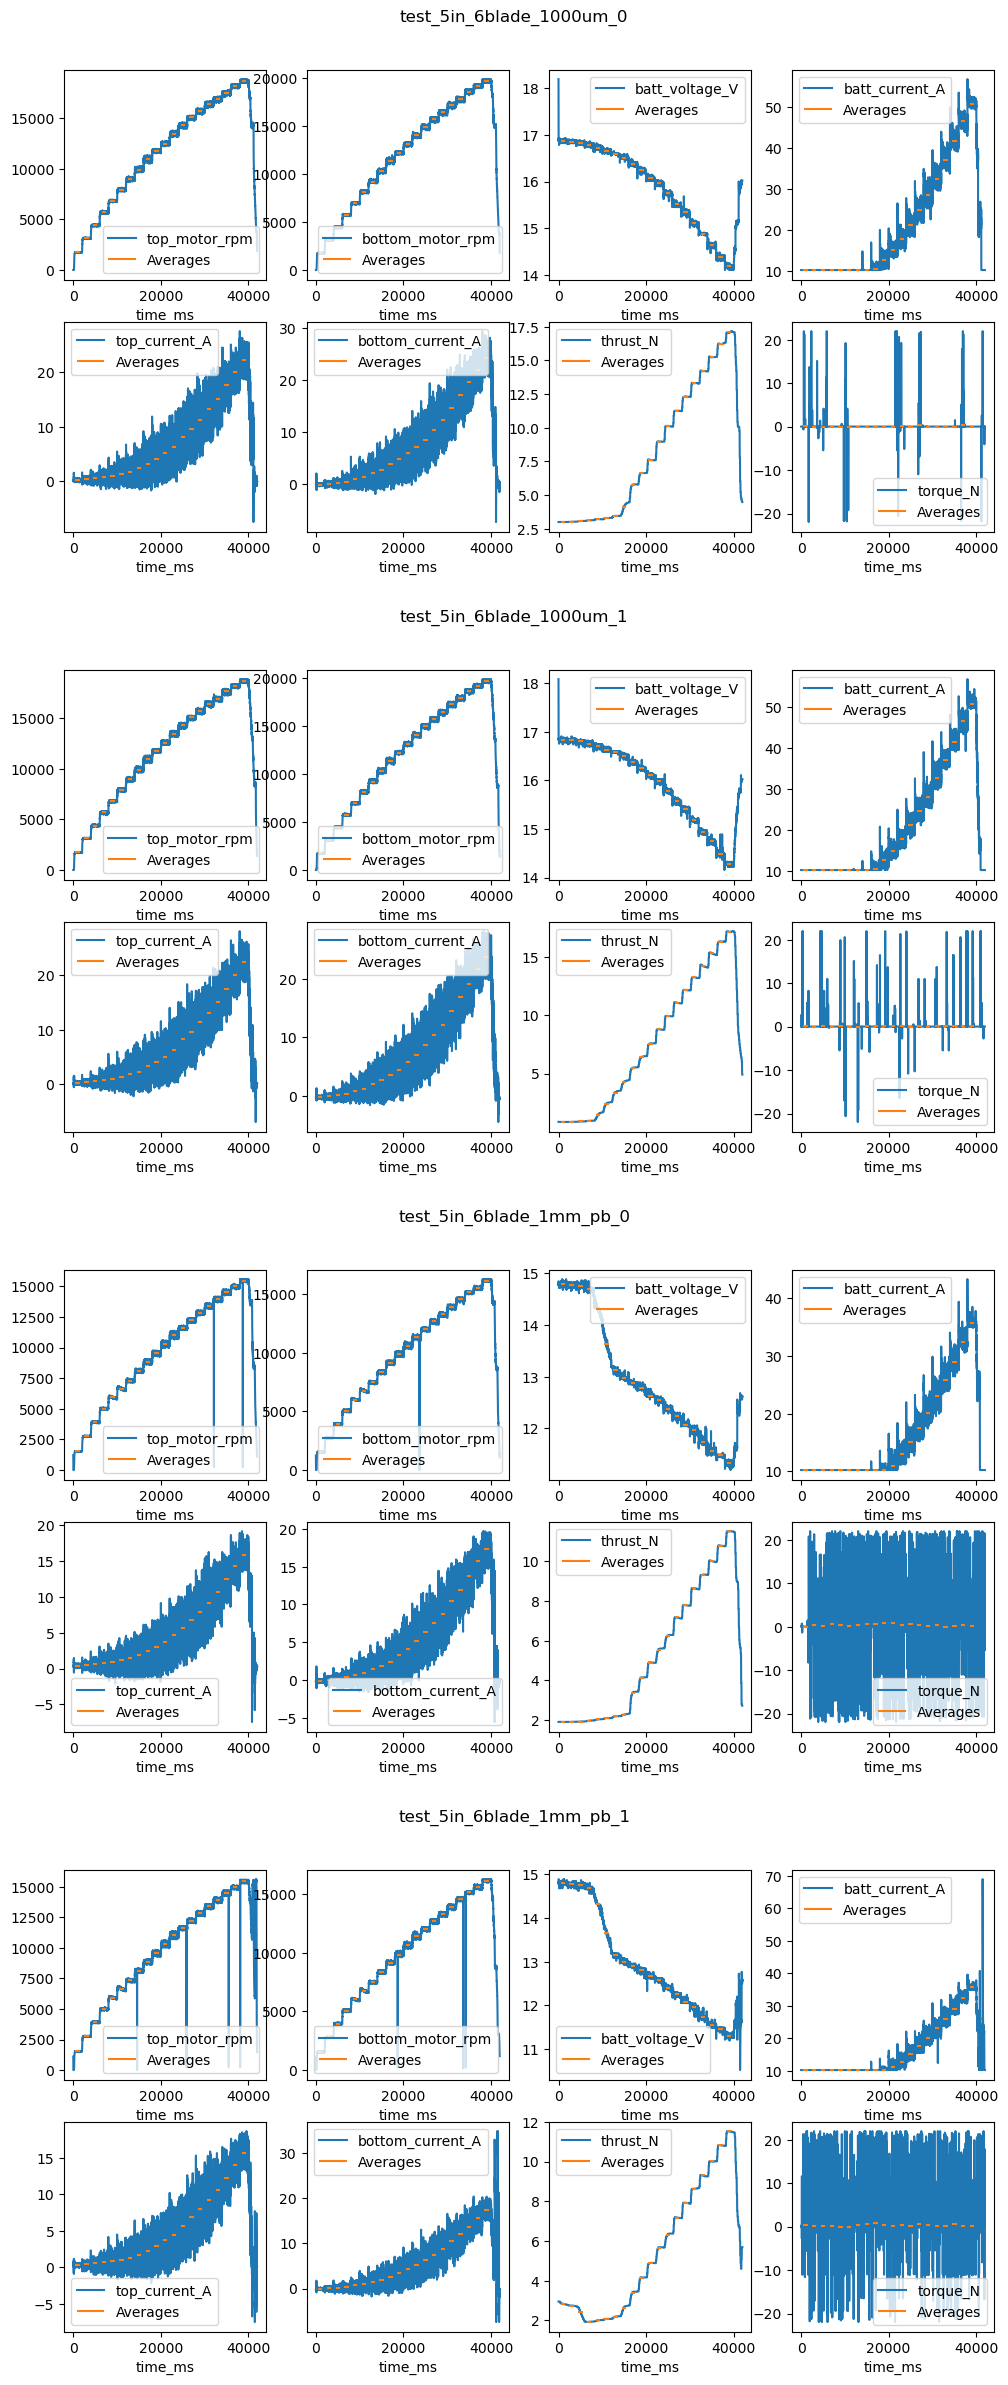

In [13]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [17]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [37]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

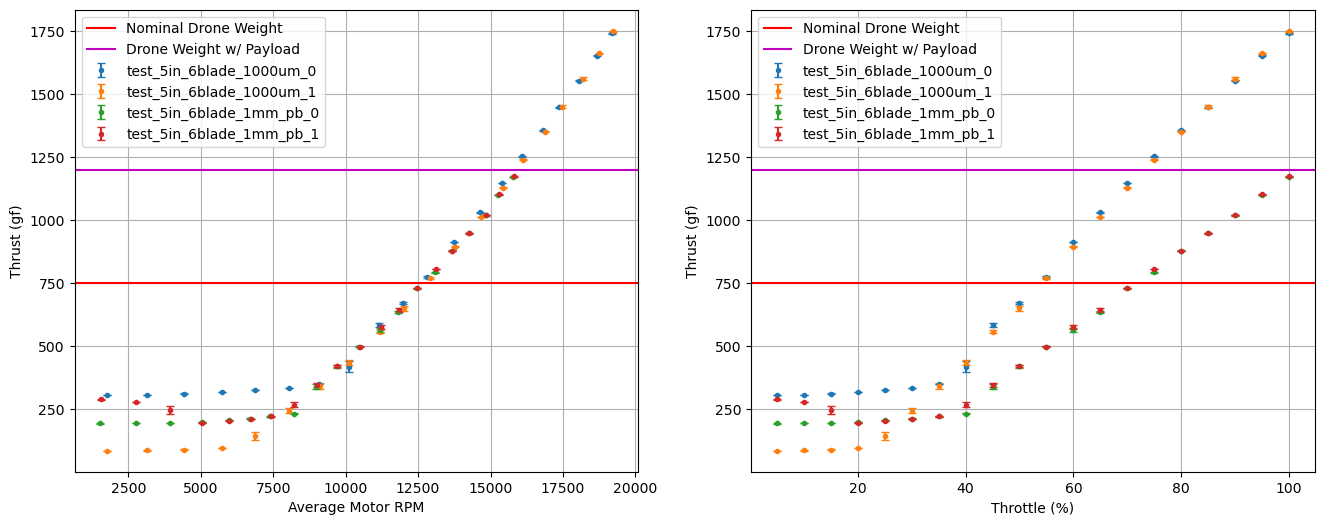

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    ax[0].errorbar(x="rpm_avg", y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    ax[1].errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)

ax[0].set_xlabel("Average Motor RPM")
ax[0].set_ylabel("Thrust (gf)")
ax[0].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[0].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Throttle (%)")
ax[1].set_ylabel("Thrust (gf)")
ax[1].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[1].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[1].legend()
ax[1].grid()

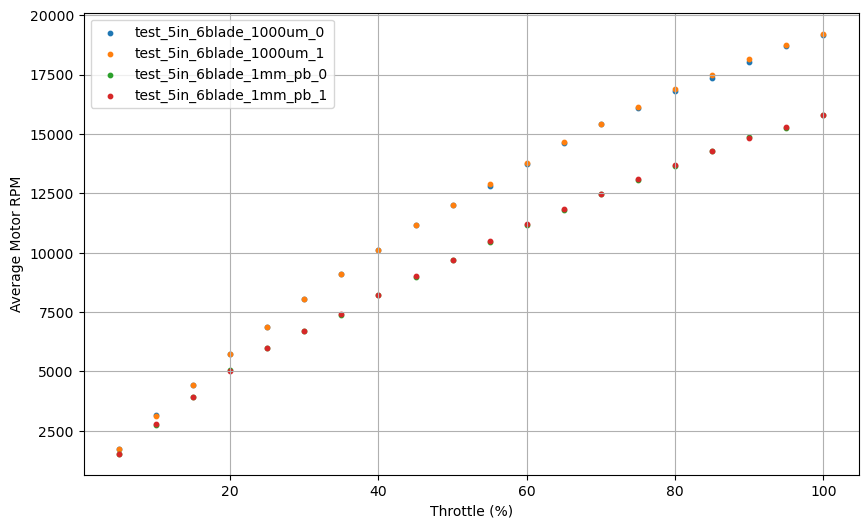

In [24]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

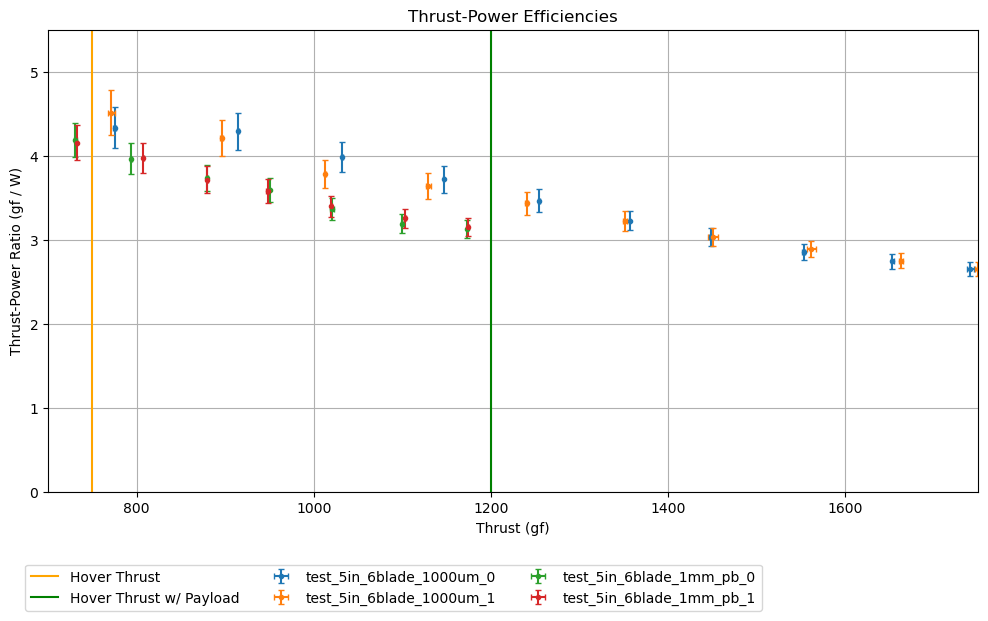

In [36]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

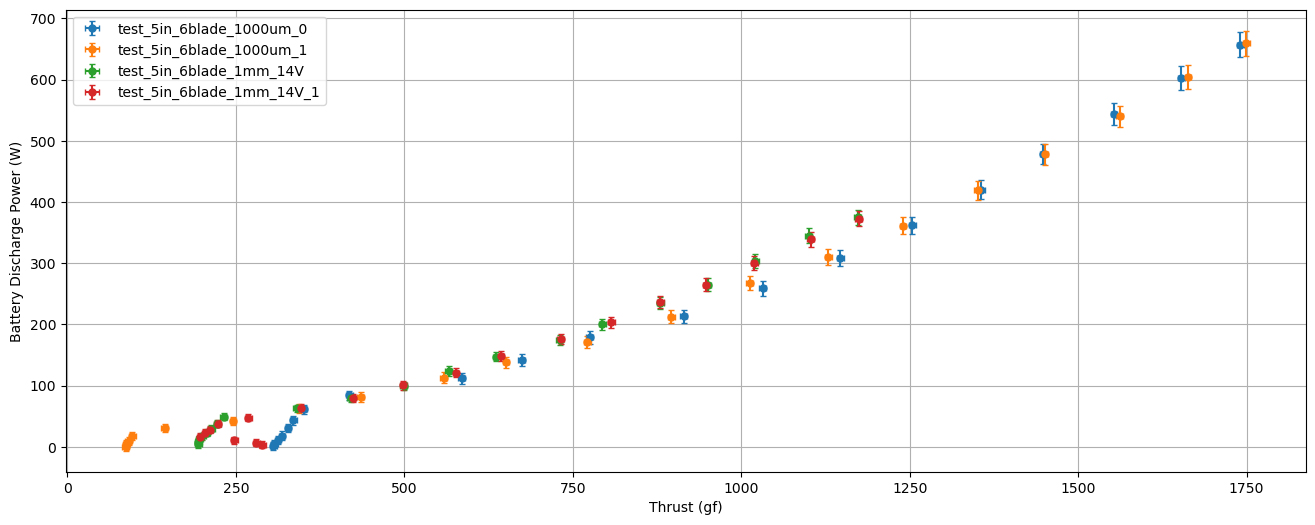

In [462]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
#plt.xlim(700, 1750)
plt.grid()
#plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
#plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [38]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle       rpm_avg  \
test_name                thrust_mean_g                            
test_5in_6blade_1000um_0 750.0          53.762078  12604.169189   
                         1200.0         72.483014  15750.713160   
test_5in_6blade_1000um_1 750.0          54.113810  12748.089203   
                         1200.0         73.191222  15872.965462   
test_5in_6blade_1mm_pb_0 750.0          71.537493  12648.217828   
                         1200.0               NaN           NaN   
test_5in_6blade_1mm_pb_1 750.0          71.189301  12624.264499   
                         1200.0               NaN           NaN   

                                        batt_power_mean  shunt_power_mean  \
test_name                thrust_mean_g                                      
test_5in_6blade_1000um_0 750.0               169.829458        233.567394   
                         1200.0              335.068228        410.825844   
test_5in_6blade_1000um_1 750.0               165.104814        232.815045   
                         1200.0              342.817005        413.625631   
test_5in_6blade_1mm_pb_0 750.0               182.375862        223.174785   
                         1200.0                     NaN               NaN   
test_5in_6blade_1mm_pb_1 750.0               182.583580        221.705792   
                         1200.0                     NaN               NaN   

                                        thrust_power_g_W  \
test_name                thrust_mean_g                     
test_5in_6blade_1000um_0 750.0                  4.432758   
                         1200.0                 3.591465   
test_5in_6blade_1000um_1 750.0                  4.548154   
                         1200.0                 3.507636   
test_5in_6blade_1mm_pb_0 750.0                  4.118964   
                         1200.0                      NaN   
test_5in_6blade_1mm_pb_1 750.0                  4.112671   
                         1200.0                      NaN   

                                        shunt_thrust_power_g_W  \
test_name                thrust_mean_g                           
test_5in_6blade_1000um_0 750.0                        3.214280   
                         1200.0                       2.924285   
test_5in_6blade_1000um_1 750.0                        3.220539   
                         1200.0                       2.902719   
test_5in_6blade_1mm_pb_0 750.0                        3.364993   
                         1200.0                            NaN   
test_5in_6blade_1mm_pb_1 750.0                        3.384184   
                         1200.0                            NaN   

                                        batt_power_err  thrust_g_err  \
test_name                thrust_mean_g                                 
test_5in_6blade_1000um_0 750.0                9.917336      2.549716   
                         1200.0              13.464147      0.989688   
test_5in_6blade_1000um_1 750.0                9.813448      4.932503   
                         1200.0              13.653882      1.998749   
test_5in_6blade_1mm_pb_0 750.0                8.737323      1.417691   
                         1200.0                    NaN           NaN   
test_5in_6blade_1mm_pb_1 750.0                8.753932      0.979295   
                         1200.0                    NaN           NaN   

                                        thrust_power_err  
test_name                thrust_mean_g                    
test_5in_6blade_1000um_0 750.0                  0.261709  
                         1200.0                 0.144956  
test_5in_6blade_1000um_1 750.0                  0.273868  
                         1200.0                 0.140319  
test_5in_6blade_1mm_pb_0 750.0                  0.198118  
                         1200.0                      NaN  
test_5in_6blade_1mm_pb_1 750.0                  0.197803  
                         1200.0                      NaN

In [39]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                 thrust_mean_g
test_5in_6blade_1000um_0  750.0           0 days 00:08:53.335034214
                          1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_1  750.0           0 days 00:09:08.596966399
                          1200.0          0 days 00:04:24.210930914
test_5in_6blade_1mm_pb_0  750.0           0 days 00:08:16.644672078
                          1200.0                                NaT
test_5in_6blade_1mm_pb_1  750.0           0 days 00:08:16.079658478
                          1200.0                                NaT
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

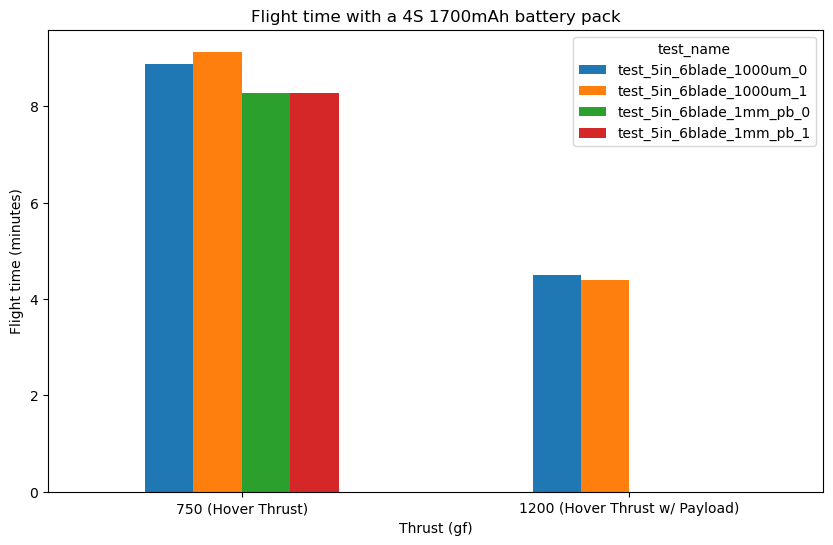

In [40]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
    figsize=(10, 6)
)